### Name - Vyom Chauhan
### Student ID - 30830192
### Question 1

In [1]:
# importing required libraries
library(reshape2)
library(ggplot2)

Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
# reading test and train data
test_df <- read.csv('Task1A_test.csv')
train_df <- read.csv('Task1A_train.csv')

In [3]:
# splitting df into test and train-data and lables 
train.data <- train_df[1]
train.label <- train_df[2]
test.data <- test_df[1]
test.label <- test_df[2]

In [4]:
# Question 1.1
# defining knn regressor function 
knn <- function(train.data, train.label, test.data, K=4){
    # straight line distance
    distance = 'euclidean'
    # number of samples in train and test data
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    # distance between data points in test and train samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    # for each test sample
    for (i in 1:test.len){
        # find its k nearrest neighbours from training sample
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        # calculate predicted label based mean of the nearest k train lables
        test.label[i, 1] = mean(train.label[nn,])
    }
    # returning class labels as output
    return (test.label)
}

In [5]:
# Question 1.1
knn(train.data, train.label, test.data, K=4)

y
0.7725
0.7725
0.7750
0.7925
0.8475
0.8675
0.9175
0.9975
1.0800
1.1925


In [6]:
# Question 1.2
# initializing the missclassification df
miss <- data.frame('K'=1:25, 'train'=rep(0,25), 'test'=rep(0,25))
# calculate the train and test missclassification rates for K in 1:25
for (k in 1:25){
    # mean absolute training error
    miss[k,'train'] <- sum(abs(knn(train.data, train.label, train.data, K=k) - train.label))/nrow(train.data)
    # mean absolute test error
    miss[k,'test'] <-  sum(abs(knn(train.data, train.label, test.data, K=k) - test.label))/nrow(test.data)
}

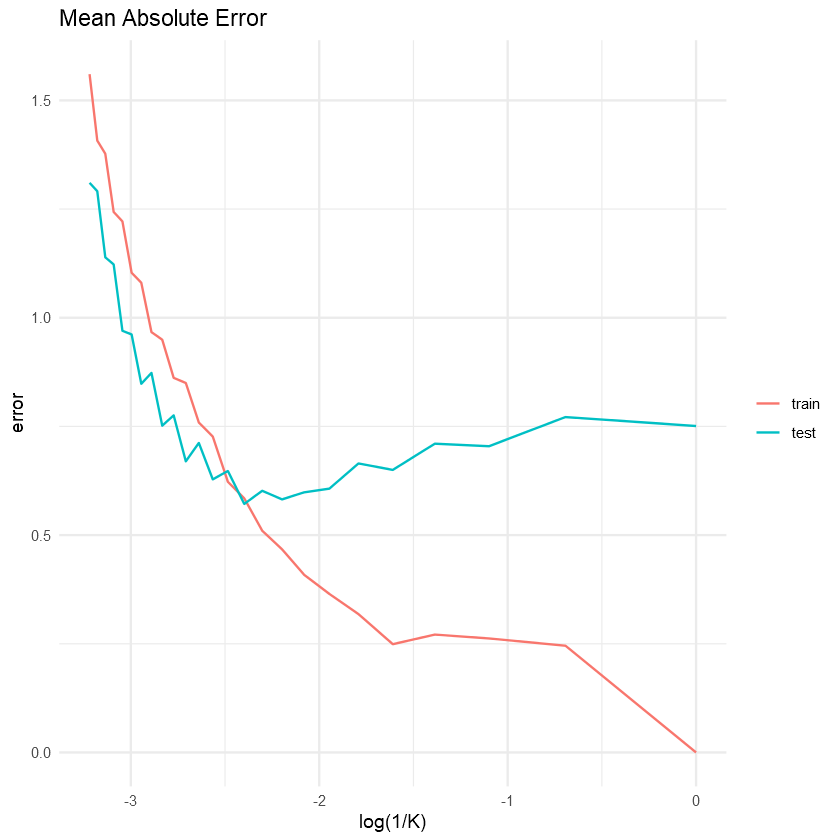

In [10]:
# Question 1.2
# reshape for visualization
miss.m <- melt(miss, id='K') 
names(miss.m) <- c('K', 'type', 'error')
# plot mean asbsolute error for train and test data sets
ggplot(data=miss.m, aes(x=log(1/K), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Mean Absolute Error")

####  Here, I've chosen the Mean Absolute Error(MAE) as the error function. MAE measures the average magnitude of errors in prediction irrespective of their direction.

### Question 1.3
#### The optimum value of K in terms of testing error is 11 (using K=11 gives the lowest magnitude of testing error).
#### Increasing the model complexity i.e. decreasing K leads to overfitting as model memorizes the training data and the training error reduces to 0 whereas the testing error increases.
#### Whereas, decreasing the model complexity i.e increasing K leads to underfitting as the model neither fits well to training data and nor to the test data (model has high test and training error).
#### The right side of the graph log(1/K) = (-0.5, 0) shows overfitted models while the left side of the graph log(1/K) = (-3.5, -3) shows underfitted models.